In [1]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import pickle as pkl
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

In [2]:
df = pd.read_csv('data/feature_enginering.csv')

In [3]:
df.head()

,person_gender,person_education,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,net_disposable_income
0,Female,Master,71948.0,Rent,19200.0,Personal,16.00,0.31,3.0,561,No,1,68876.00
1,Female,High School,28367.0,Own,3000.0,Education,11.14,0.08,2.0,539,Yes,0,28032.80
2,Female,High School,28367.0,Mortgage,5500.0,Medical,12.87,0.31,3.0,635,No,1,27659.15
3,Female,Bachelor,79753.0,Rent,19200.0,Medical,15.23,0.31,2.0,675,No,1,76828.84
4,Male,Master,66135.0,Rent,19200.0,Medical,14.27,0.31,4.0,586,No,1,63395.16


In [4]:
# apply label encoder
columns = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
encoders = {}
for column in columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    encoders[column] = label_encoder
    print(f"Mapping for {column}:") 
    # mapping of the data
    for class_, index_ in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)): 
        print(f"{class_} -> {index_}")

Mapping for person_gender:
Female -> 0
Male -> 1
Mapping for person_education:
Associate -> 0
Bachelor -> 1
Doctorate -> 2
High School -> 3
Master -> 4
Mapping for person_home_ownership:
Mortgage -> 0
Other -> 1
Own -> 2
Rent -> 3
Mapping for loan_intent:
Debtconsolidation -> 0
Education -> 1
Homeimprovement -> 2
Medical -> 3
Personal -> 4
Venture -> 5
Mapping for previous_loan_defaults_on_file:
No -> 0
Yes -> 1


In [5]:
# save the encoding
with open('encoders.pkl', 'wb') as encoder_file: 
    pkl.dump(encoders, encoder_file)

In [6]:
df.head()

,person_gender,person_education,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,net_disposable_income
0,0,4,71948.0,3,19200.0,4,16.00,0.31,3.0,561,0,1,68876.00
1,0,3,28367.0,2,3000.0,1,11.14,0.08,2.0,539,1,0,28032.80
2,0,3,28367.0,0,5500.0,3,12.87,0.31,3.0,635,0,1,27659.15
3,0,1,79753.0,3,19200.0,3,15.23,0.31,2.0,675,0,1,76828.84
4,1,4,66135.0,3,19200.0,3,14.27,0.31,4.0,586,0,1,63395.16


In [7]:
df.dtypes

person_gender                       int32
person_education                    int32
person_income                     float64
person_home_ownership               int32
loan_amnt                         float64
loan_intent                         int32
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file      int32
loan_status                         int64
net_disposable_income             float64
dtype: object

In [9]:
# standarization
columns = df[['person_income', 'loan_amnt', 'loan_int_rate', 'cb_person_cred_hist_length', 'credit_score', 'net_disposable_income']]
scaler = StandardScaler()
columns = scaler.fit_transform(columns)

df[['person_income', 'loan_amnt', 'loan_int_rate', 'cb_person_cred_hist_length', 'credit_score', 'net_disposable_income']] = columns

In [10]:
df.head()

,person_gender,person_education,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,net_disposable_income
0,0,4,-0.106043,3,1.929418,4,1.792355,0.31,-0.794462,-1.564522,0,1,-0.161591
1,0,3,-1.271863,2,-1.210642,1,0.063765,0.08,-1.085922,-2.040870,1,0,-1.260863
2,0,3,-1.271863,0,-0.726065,3,0.679086,0.31,-0.794462,0.037741,0,1,-1.270920
3,0,1,0.102745,3,1.929418,3,1.518483,0.31,-1.085922,0.903829,0,1,0.052455
4,1,4,-0.261545,3,1.929418,3,1.177034,0.31,-0.503002,-1.023217,0,1,-0.309105


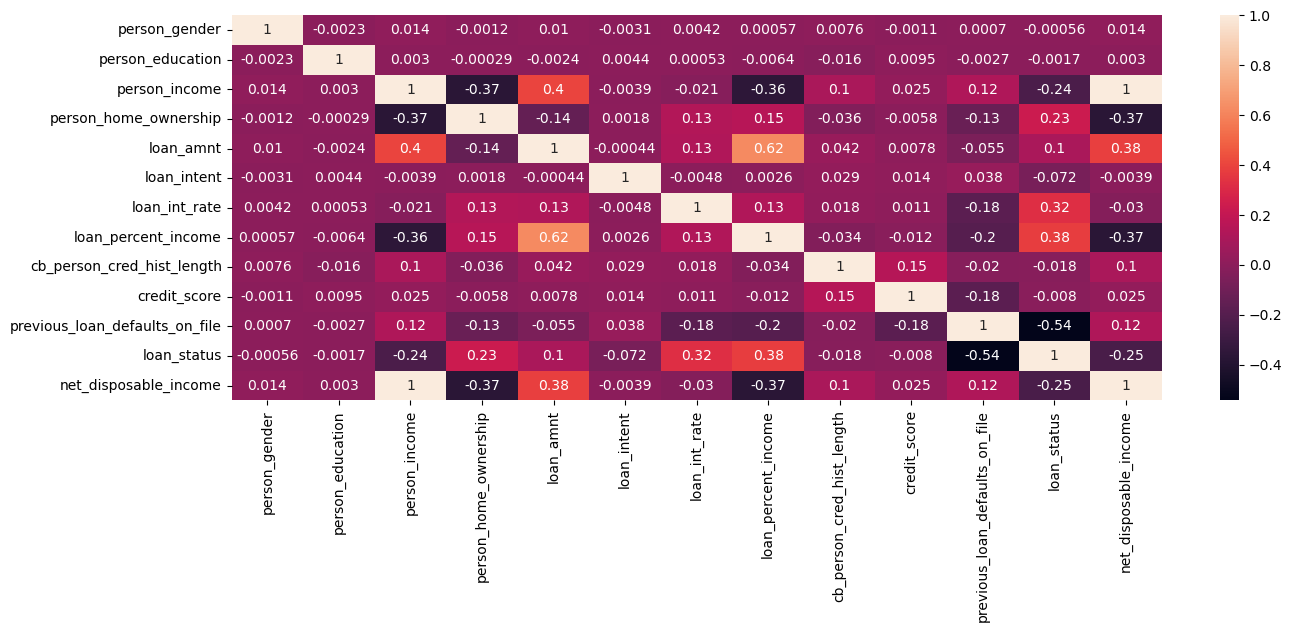

In [11]:
# heatmap
plt.figure(figsize=(15, 5))
sns.heatmap(df.corr(), annot=True)
plt.savefig('heatmap.png')
plt.show()

In [12]:
cols = df.columns

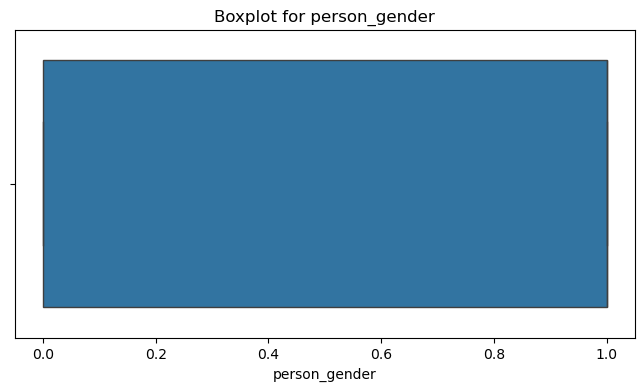

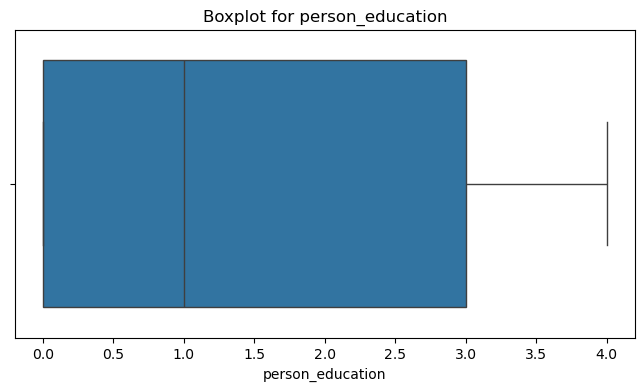

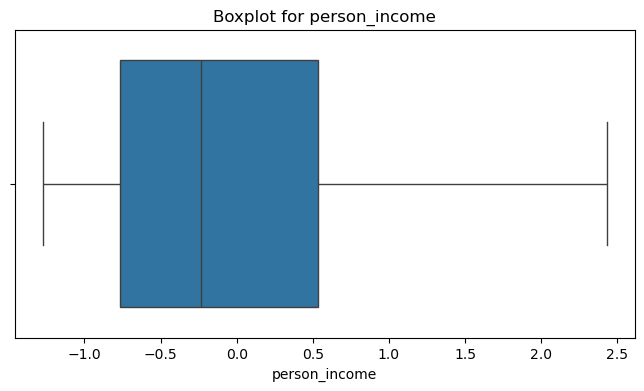

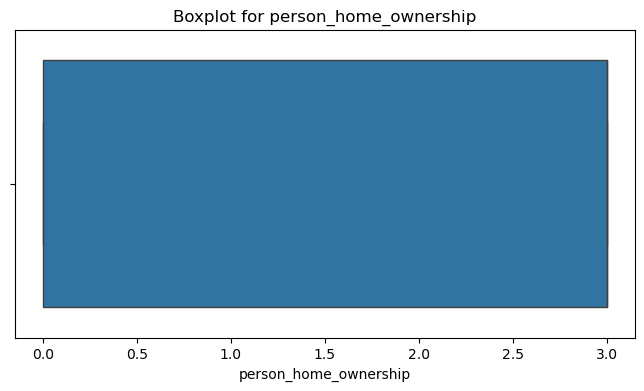

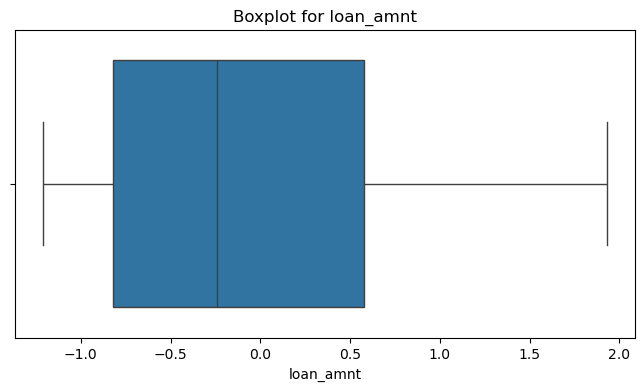

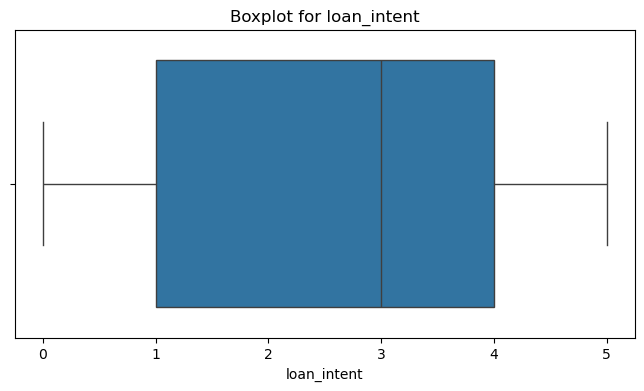

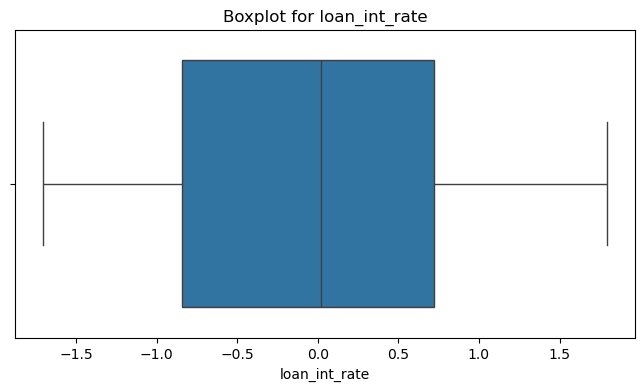

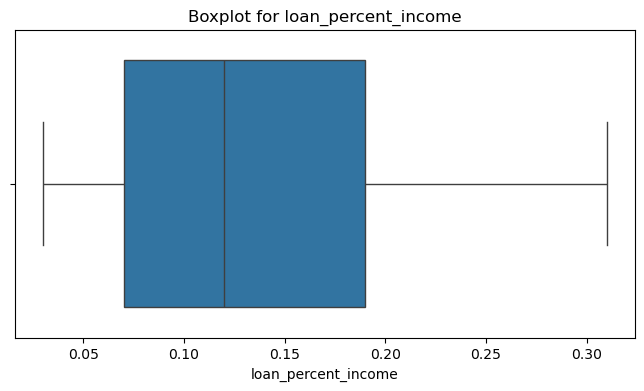

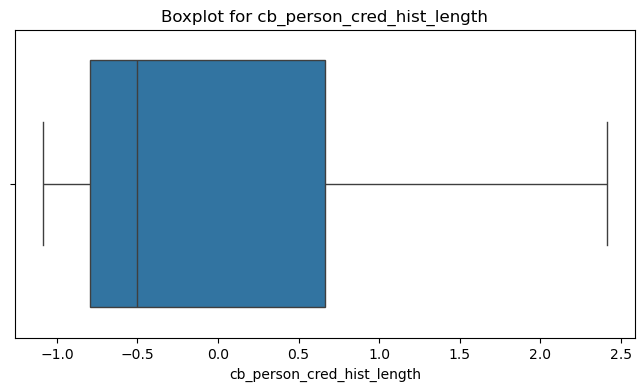

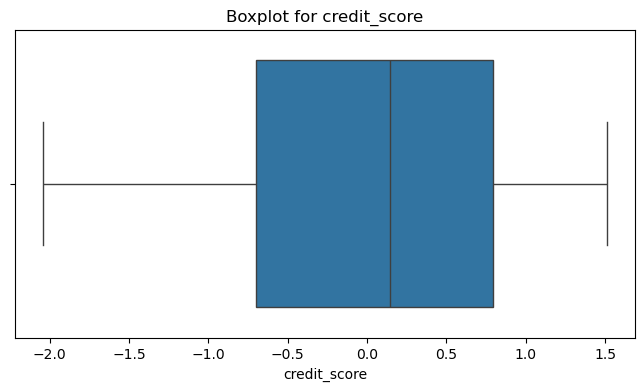

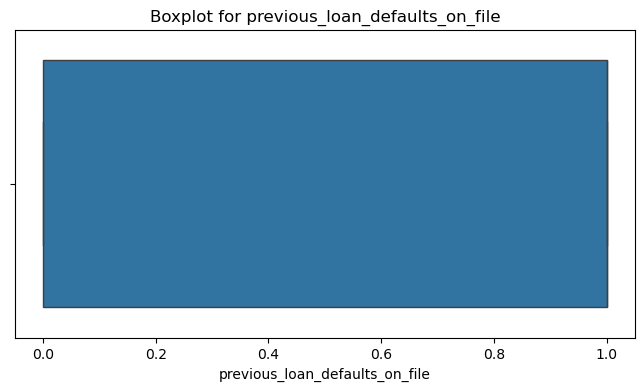

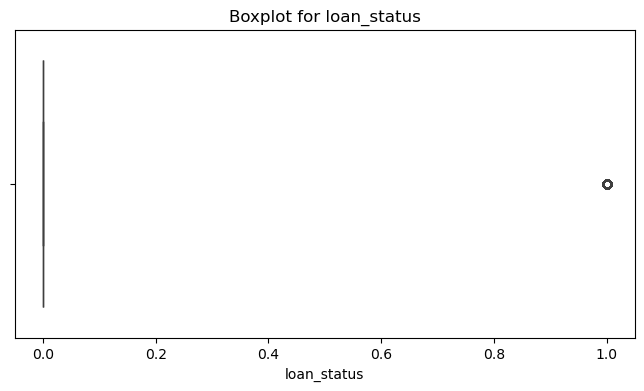

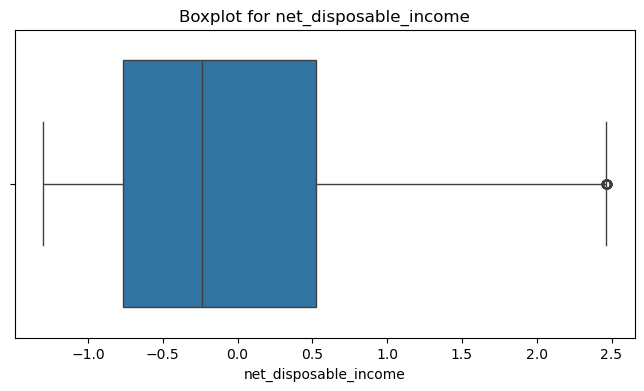

In [13]:
for col in cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


In [16]:
new_cols = ['net_disposable_income']

for col in new_cols:
    df[col] = winsorize(df[col], limits=[0.1, 0.1])

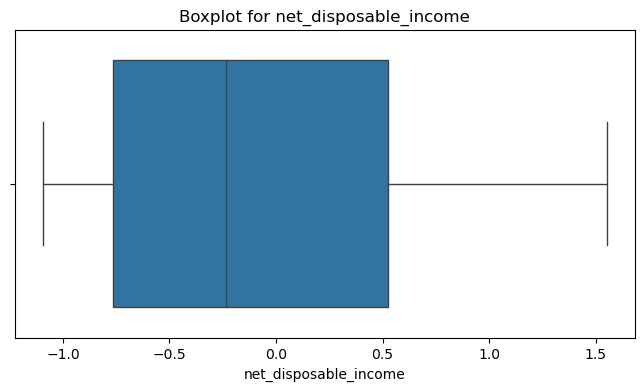

In [17]:
for col in new_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


In [18]:
df.to_csv('data/processed_data.csv', index=False)